# Test plotting on one trained model

## Imports and paths

In [1]:
# Absolute paths
CHECKPOINT_PATH = "/home/alex/Documents/MIR_trained_models/"
DATASET_PATH = "/home/alex/Documents/Datasets/"

# imports 
import os
import torch
from models_dict import models_dict
import models
import dataset
from dataset import prep_dataset
import numpy as np
from torchsummary import summary

## Get keys to one model and try re-creating from ONLY the model checkpoint

In [2]:
checkpoint_file = CHECKPOINT_PATH + "DELETE_THIS_TESTING.pt"
checkpoint = torch.load(checkpoint_file)
checkpoint.keys()

dict_keys(['filename', 'epochs', 'model_id', 'model_state_dict', 'model_args', 'metrics', 'dataset_info', 'notes', 'summary', 'experiment_params'])

In [3]:
checkpoint['model_args']

{'channels': [8, 8, 32, 32, 64],
 'conv_kernel_sizes': [3, 3, 3, 3, 3],
 'conv_strides': [1, 1, 1, 1, 1],
 'conv_paddings': [1, 1, 1, 1, 1],
 'pool_masks': [True, True, True, True, True],
 'pool_kernel_sizes': [2, 2, 2, (1, 2), (1, 2)],
 'pool_strides': [2, 2, 2, (1, 2), (1, 2)],
 'linear_features': [128, 64],
 'dropout_probs': [0, 0]}

## Get one mfcc for initialization

In [4]:
train_loader, val_loader, dataset = prep_dataset(
    filename="irmas_data_mfcc13_hop_length256_n_fft2048.json",
    batch_size=1, val_split=0.2)
single_sample = dataset[0]


In [5]:
one_mfcc = np.array(single_sample['mfccs'])

In [6]:
model = models_dict[checkpoint['model_id']](one_mfcc, **checkpoint['model_args'])
summary(model, one_mfcc.shape, verbose=0)

Layer (type:depth-idx)                   Output Shape              Param #
├─ConvBlock: 1-1                         [-1, 8, 6, 258]           --
|    └─Sequential: 2-1                   [-1, 8, 6, 258]           --
|    |    └─Conv2d: 3-1                  [-1, 8, 13, 517]          80
|    |    └─ReLU: 3-2                    [-1, 8, 13, 517]          --
|    |    └─MaxPool2d: 3-3               [-1, 8, 6, 258]           --
|    |    └─BatchNorm2d: 3-4             [-1, 8, 6, 258]           16
├─ConvBlock: 1-2                         [-1, 8, 3, 129]           --
|    └─Sequential: 2-2                   [-1, 8, 3, 129]           --
|    |    └─Conv2d: 3-5                  [-1, 8, 6, 258]           584
|    |    └─ReLU: 3-6                    [-1, 8, 6, 258]           --
|    |    └─MaxPool2d: 3-7               [-1, 8, 3, 129]           --
|    |    └─BatchNorm2d: 3-8             [-1, 8, 3, 129]           16
├─ConvBlock: 1-3                         [-1, 32, 1, 64]           --
|    └─Sequent

In [7]:
checkpoint['metrics'].keys()

dict_keys(['avg_train_loss_hist', 'std_train_loss_hist', 'avg_val_loss_hist', 'std_val_loss_hist', 'train_acc_hist', 'train_prec_hist', 'train_recall_hist', 'train_f1_hist', 'val_acc_hist', 'val_prec_hist', 'val_recall_hist', 'val_f1_hist'])

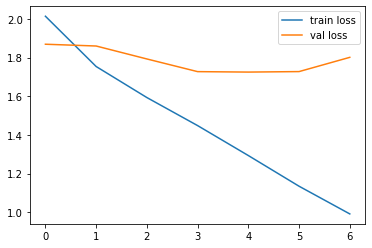

In [12]:
import matplotlib.pyplot as plt

plt.plot(checkpoint['metrics']['avg_train_loss_hist'], label="train loss")
plt.plot(checkpoint['metrics']['avg_val_loss_hist'], label="val loss")
plt.legend()